# Analysis of the KNNBasic algorithm

In this notebook, we will run a basic neighborhood algorithm on the movielens dataset, dump the results, and use pandas to make some data analysis.

In [1]:
import pickle #객체 저장용
import os

import pandas as pd

from surprise import KNNBasic
from surprise import Dataset #surprise의 특별한 데이터 형식을 위해                                                    
from surprise import Reader #Pandas DataFrame을 입력할때 사용하는 함수                                                    
from surprise import dump
from surprise.accuracy import rmse #평가척도

In [13]:
data = Dataset.load_builtin('ml-100k')

In [6]:
x = data.folds()
a,b = next(x)

In [9]:
a #Trainset

In [14]:
algo = KNNBasic()

In [17]:
for trainset, testset in data.folds(): # train_test_split할 필요없이 자동으로 train,test를 나눠준다.
    algo.fit(trainset) #algo.train과 같은 기능      
    predictions = algo.test(testset) #score의 정확도만 따지는 문제 때문에 test, 평가척도를 사용해 평가한다.
    rmse(predictions, verbose=True) #root mean sqular error, verbos는 과정마다 학습정도를 보여준다.
                                                                               
#     dump.dump('./dump_file', predictions, algo) #학습시킨 모델을 저장해둔다.-> 나중에 다시 사용할때의 시간절약을 위해서

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9720
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9854
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9815
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9849
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9694


In [18]:
# The dump has been saved and we can now use it whenever we want.
# Let's load it and see what we can do
# predictions, algo = dump.load('./dump_file') #앞서 저장된 모델을 불러온다.

In [20]:
vars(algo) #현재 학습된 후에 어떤 점이 변했는지 

{'bsl_options': {},
 'sim_options': {'user_based': True},
 'skip_train': False,
 'verbose': True,
 'k': 40,
 'min_k': 1,
 'trainset': <surprise.trainset.Trainset at 0x125215940>,
 'bu': None,
 'bi': None,
 'n_x': 943,
 'n_y': 1646,
 'xr': defaultdict(list,
             {0: [(0, 5.0),
               (604, 4.0),
               (109, 4.0),
               (30, 2.0),
               (220, 3.0),
               (277, 5.0),
               (331, 4.0),
               (700, 4.0),
               (403, 3.0),
               (219, 5.0),
               (25, 5.0),
               (571, 1.0),
               (413, 5.0),
               (1077, 3.0),
               (95, 5.0),
               (523, 4.0),
               (1382, 4.0),
               (738, 5.0),
               (196, 5.0),
               (860, 4.0),
               (311, 5.0),
               (133, 3.0),
               (689, 2.0),
               (405, 4.0),
               (27, 3.0),
               (673, 4.0),
               (200, 4.0),
               

In [21]:
trainset = algo.trainset

In [24]:
trainset.all_users()

range(0, 943)

In [19]:
print('algo: {0}, k = {1}, min_k = {2}'.format(algo.__class__.__name__, algo.k, algo.min_k))

algo: KNNBasic, k = 40, min_k = 1


In [13]:
# Let's build a pandas dataframe with all the predictions

def get_Iu(uid):
    """Return the number of items rated by given user
    
    Args:
        uid: The raw id of the user.
    Returns:
        The number of items rated by the user.
    """
    
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError:  # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """Return the number of users that have rated given item
    
    Args:
        iid: The raw id of the item.
    Returns:
        The number of users that have rated the item.
    """
    
    try:
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:  # item was not part of the trainset
        return 0

df = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])    
df['Iu'] = df.uid.apply(get_Iu)
df['Ui'] = df.iid.apply(get_Ui)
df['err'] = abs(df.est - df.rui)

In [14]:
df.head()

uid iid  rui       est                                    details   Iu   Ui  \
0   1   6  5.0  3.468613  {'actual_k': 20, 'was_impossible': False}  135   20   
1   1  10  3.0  3.866290  {'actual_k': 40, 'was_impossible': False}  135   73   
2   1  12  5.0  4.538194  {'actual_k': 40, 'was_impossible': False}  135  211   
3   1  14  5.0  4.235741  {'actual_k': 40, 'was_impossible': False}  135  140   
4   1  17  3.0  3.228002  {'actual_k': 40, 'was_impossible': False}  135   72   

        err  
0  1.531387  
1  0.866290  
2  0.461806  
3  0.764259  
4  0.228002

In [15]:
best_predictions = df.sort_values(by='err')[:10]
worst_predictions = df.sort_values(by='err')[-10:]

In [16]:
# Let's take a look at the best predictions of the algorithm
best_predictions

uid   iid  rui  est                                   details   Iu  Ui  \
272      5   439  1.0  1.0  {'actual_k': 3, 'was_impossible': False}   91   3   
886     13   314  1.0  1.0  {'actual_k': 2, 'was_impossible': False}  373   2   
156      2   314  1.0  1.0  {'actual_k': 2, 'was_impossible': False}   40   2   
926     13   437  1.0  1.0  {'actual_k': 3, 'was_impossible': False}  373   3   
9276   206   314  1.0  1.0  {'actual_k': 1, 'was_impossible': False}   33   2   
19118  405   437  1.0  1.0  {'actual_k': 3, 'was_impossible': False}  582   3   
8032   181  1334  1.0  1.0  {'actual_k': 1, 'was_impossible': False}  218   1   
8041   181  1354  1.0  1.0  {'actual_k': 1, 'was_impossible': False}  218   1   
9202   201  1424  3.0  3.0  {'actual_k': 1, 'was_impossible': False}  215   1   
3018    60  1123  4.0  4.0  {'actual_k': 1, 'was_impossible': False}  119   1   

       err  
272    0.0  
886    0.0  
156    0.0  
926    0.0  
9276   0.0  
19118  0.0  
8032   0.0  
8041   0.0  
9202   0.0  
3018   0.0

It's interesting to note that these perfect predictions are actually lucky shots: $|U_i|$ is always very small, meaning that very few users have rated the target item. This implies that the set of neighbors is very small (see the ``actual_k`` field)... And, it just happens that all the ratings from the neighbors are the same (and mostly, are equal to that of the target user).

This may be a bit surprising but these lucky shots are actually very important to the accuracy of the algorithm... Try running the same algorithm with a value of ``min_k`` equal to $10$. This means that if there are less than $10$ neighbors, the prediction is set to the mean of all ratings. You'll see your accuracy decrease!

In [17]:
# Now, let's look at the prediction with the biggest error
worst_predictions

uid   iid  rui       est                                    details  \
9406   208   302  1.0  4.308447  {'actual_k': 40, 'was_impossible': False}   
19089  405   169  1.0  4.364728  {'actual_k': 40, 'was_impossible': False}   
19785  436   132  1.0  4.365369  {'actual_k': 40, 'was_impossible': False}   
157      2   315  1.0  4.381308  {'actual_k': 40, 'was_impossible': False}   
8503   193    56  1.0  4.386478  {'actual_k': 40, 'was_impossible': False}   
5531   113   976  5.0  1.610771   {'actual_k': 7, 'was_impossible': False}   
7917   181   408  1.0  4.421499  {'actual_k': 40, 'was_impossible': False}   
7390   167   169  1.0  4.664991  {'actual_k': 40, 'was_impossible': False}   
7412   167  1306  5.0  1.000000   {'actual_k': 1, 'was_impossible': False}   
5553   114  1104  5.0  1.000000   {'actual_k': 1, 'was_impossible': False}   

        Iu   Ui       err  
9406    11  245  3.308447  
19089  582   97  3.364728  
19785  126  200  3.365369  
157     40  136  3.381308  
8503    61  312  3.386478  
5531    31    7  3.389229  
7917   218   93  3.421499  
7390    38   97  3.664991  
7412    38    1  4.000000  
5553    27    1  4.000000

Let's focus first on the last two predictions. Well, we can't do much about them. We should have predicted $5$, but the only available neighbor had a rating of $1$, so we were screwed. The only way to avoid this kind of errors would be to increase the ``min_k`` parameter, but it would actually worsen the accuracy (see note above).

How about the other ones? It seems that for each prediction, the users are some kind of outsiders: they rated their item with a rating of $1$ when the most of the ratings for the item where high (or inversely, rated a *bad* item with a rating of $5$). See the plot below as an illustration for the first rating.

These are situations where baseline estimates would be quite helpful, in order to deal with highly biased users (and items).

<IPython.core.display.Javascript object>


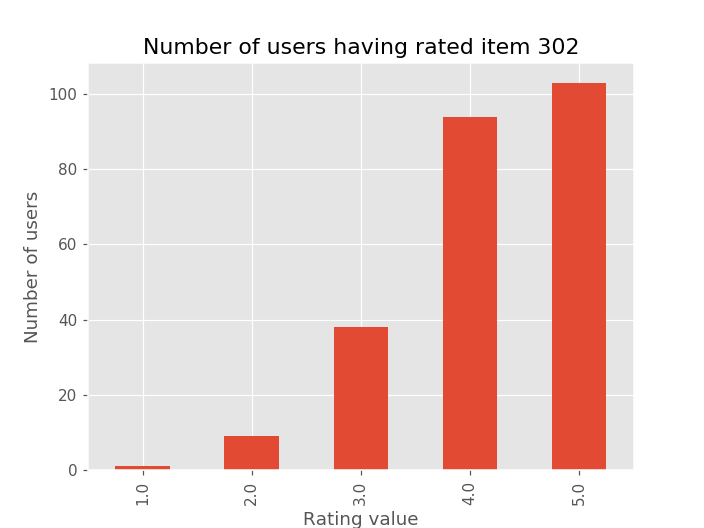

In [19]:
from collections import Counter

import matplotlib.pyplot as plt
import matplotlib
%matplotlib notebook
matplotlib.style.use('ggplot')

counter = Counter([r for (_, r) in trainset.ir[trainset.to_inner_iid('302')]])
pd.DataFrame.from_dict(counter, orient='index').plot(kind='bar', legend=False)
plt.xlabel('Rating value')
plt.ylabel('Number of users')
plt.title('Number of users having rated item 302')